## Моделирование NVT ансамбля

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NVT$;
   - Начальная температура: $T_i = 1.3~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-4}~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $40000$;
   - Равновесные характеристики системы рассчитывалась через каждые $2000$ шагов;
   - Число шагов на уравновешивание системы при фиксированных внешних условиях: $M=15000$;
   - Число ансамблей $N=5000$;
   - Усреднение по ансамблям при фиксированных внешних условиях: $2N-1$ шагов (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [7]:
CURRENT_DATA = '2021-10-05'
DIR_POSTFIX = '_test_rmc'
PLOT_FILENAME_POSTFIX = 'test_rmc'

In [8]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_DATA

'D:\\git_reps\\molecular_dynamics\\data\\2021-10-05_test_rmc'

In [9]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_PLOTS

'D:\\git_reps\\molecular_dynamics\\plots\\2021-10-05_test_rmc'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [11]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf') and not filename.startswith('rdf_sample'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)

setups = setups[-8:]
setups

[{'temperature': 1.30075, 'pressure': 1.46834, 'heating_velocity': 0.02},
 {'temperature': 1.30075, 'pressure': 1.46834, 'heating_velocity': 0.02}]

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [12]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1
0,0.01,0.000000,0.000000
1,0.02,0.000000,0.000000
2,0.03,0.000000,0.000000
3,0.04,0.000000,0.000000
4,0.05,0.000000,0.000000
...,...,...,...
607,6.08,1.001271,1.001271
608,6.09,1.001697,1.001697
609,6.10,1.001940,1.001940
610,6.11,1.002143,1.002143


In [13]:
pp.rdf.data.sum()

radius     1875.780000
setup_0     539.327992
setup_1     539.327992
dtype: float64

#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

In [20]:
new_rdf = pd.read_csv(
    os.path.join(PATH_TO_CURRENT_DATA, 'rdf_sample__2021_10_07_10_33_40.csv'),
    sep=';'
)
new_rdf_1 = pd.read_csv(
    os.path.join(PATH_TO_CURRENT_DATA, 'rdf_sample__2021_10_07_10_51_23.csv'),
    sep=';'
)
new_rdf_2 = pd.read_csv(
    os.path.join(PATH_TO_CURRENT_DATA, 'rdf_sample__2021_10_07_11_49_10.csv'),
    sep=';'
)

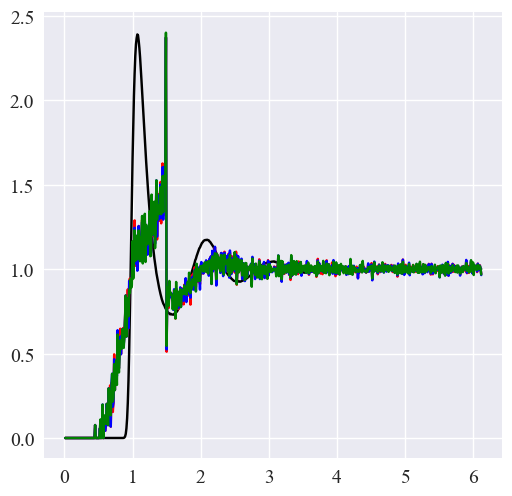

In [21]:
plt.plot(pp.rdf.data.radius, pp.rdf.data.setup_0, color='black');
plt.plot(new_rdf.radius, new_rdf.rdf, color='red');
plt.plot(new_rdf_1.radius, new_rdf_1.rdf, color='blue');
plt.plot(new_rdf_2.radius, new_rdf_2.rdf, color='green');

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

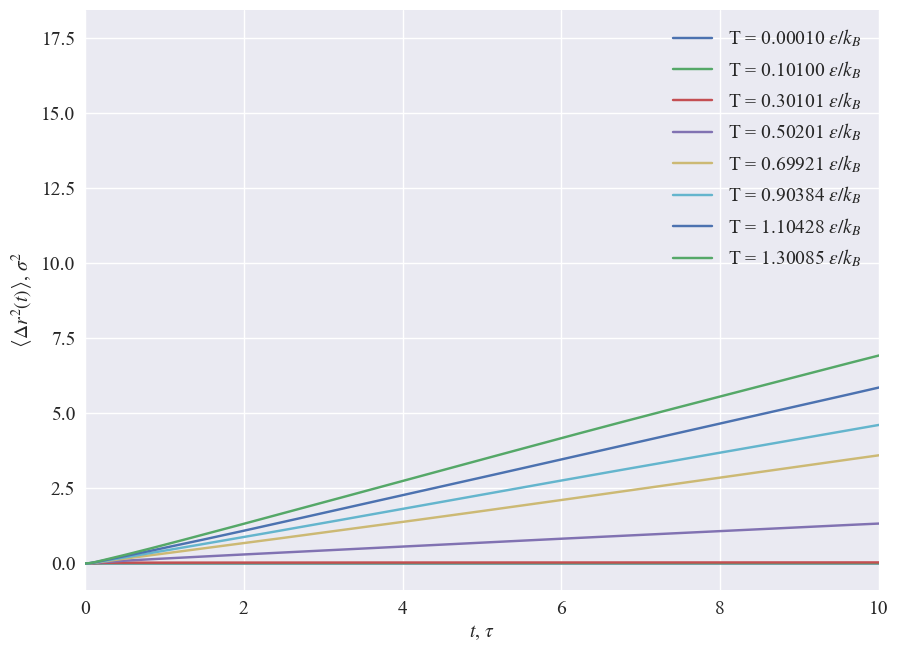

In [10]:
pp.plot_msd(
    figsize=(10.24, 7.68),
    left=0,
    right=10,
#     bottom=1e-9, 
#     top=1e2,
#     y_scale='log',
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

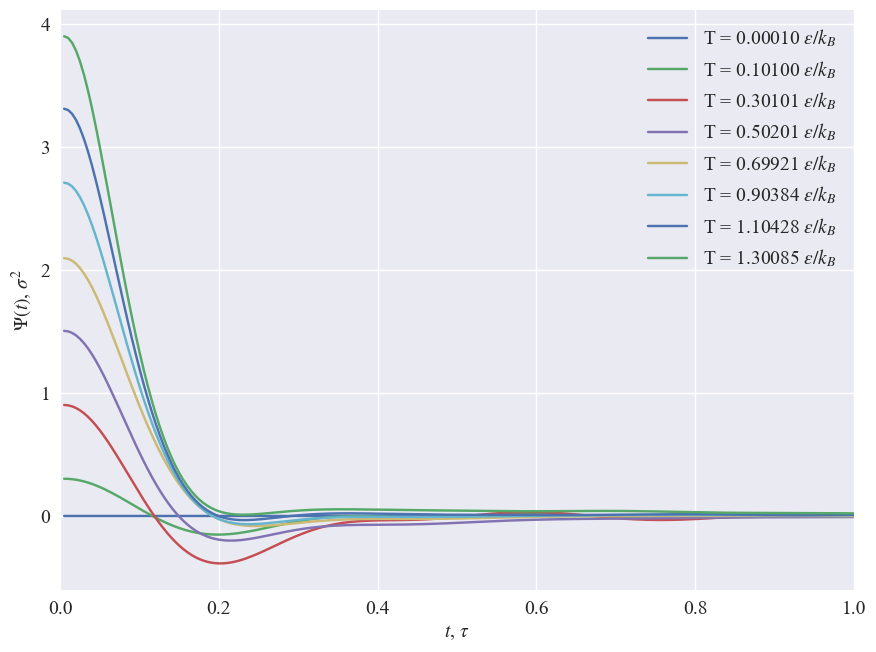

In [11]:
pp.plot_vaf(
    figsize=(10.24, 7.68),
    left=0,
    right=1,
#     bottom=-2,
#     top=10,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

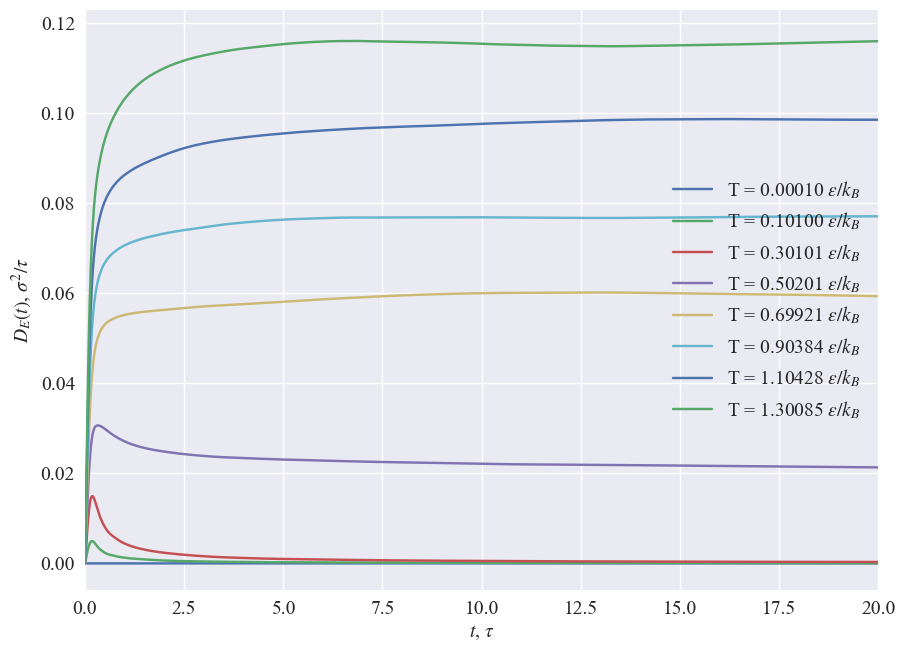

In [12]:
pp.plot_einstein_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

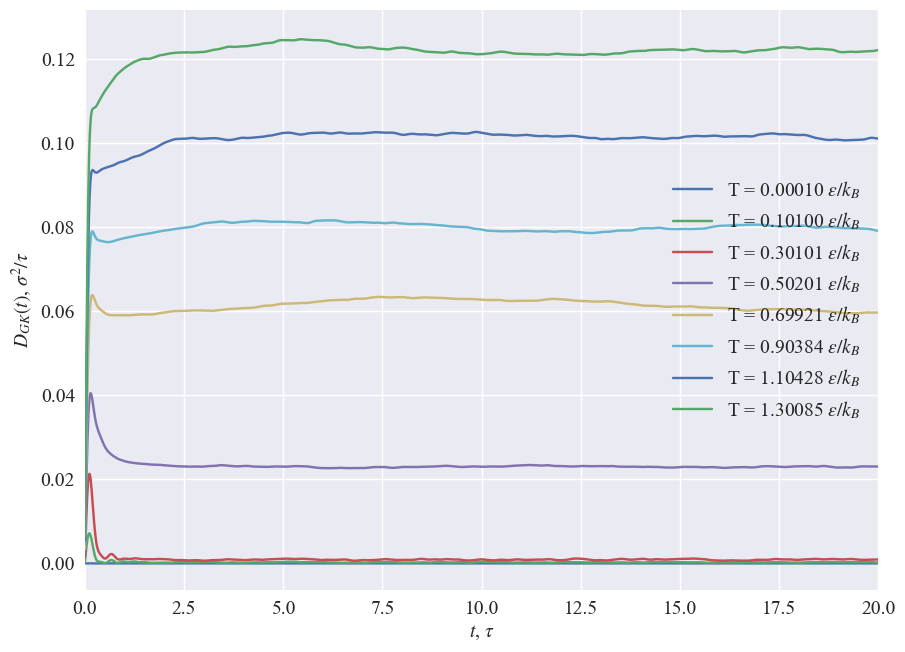

In [13]:
pp.plot_gk_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

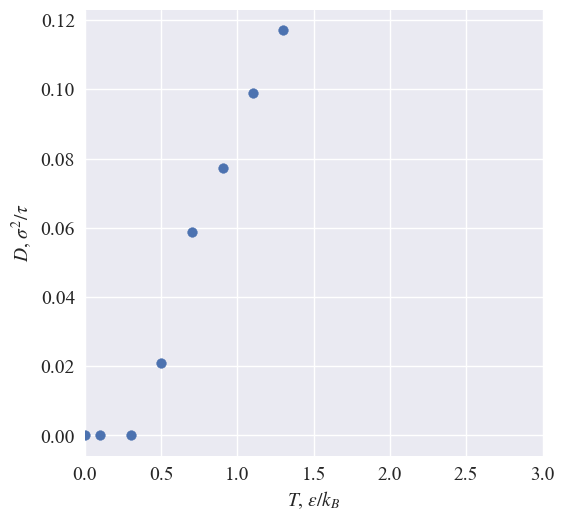

In [14]:
pp.plot_diffusion(
    figsize=(10.24, 7.68),
    left=0, 
    right=3,
#     bottom=0, 
#     top=0.3,
)

#### Таблица временных зависимостей характеристик системы

In [15]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters = pp.system_parameters[39:].reset_index(drop=True)

pp.system_parameters = pp.system_parameters[pp.system_parameters['volume'] != 0.0]
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,0.200,1.30301,1.57566,2676.44240,-6266.6980,-3590.2559,3336.5640,0.0,0.0,1838.2656
1,0.205,1.30334,1.57564,2677.90800,-6267.4220,-3589.5140,3333.4968,0.0,0.0,1838.2656
2,0.210,1.30368,1.57409,2679.18820,-6268.8230,-3589.6350,3322.3848,0.0,0.0,1838.2656
3,0.215,1.30390,1.57079,2680.03800,-6271.5030,-3591.4648,3302.4910,0.0,0.0,1838.2656
4,0.220,1.30404,1.56650,2680.60380,-6274.3945,-3593.7908,3277.7385,0.0,0.0,1838.2656
...,...,...,...,...,...,...,...,...,...,...
1999956,9999.980,0.00010,-0.90487,0.20743,-9896.6010,-9896.3940,-4990.5645,0.0,0.0,1838.2656
1999957,9999.985,0.00010,-0.90491,0.20342,-9896.6410,-9896.4375,-4990.7760,0.0,0.0,1838.2656
1999958,9999.990,0.00010,-0.90487,0.20763,-9896.6200,-9896.4120,-4990.5796,0.0,0.0,1838.2656
1999959,9999.995,0.00010,-0.90489,0.20360,-9896.6520,-9896.4490,-4990.6980,0.0,0.0,1838.2656


#### Зависимость объёма системы от времени

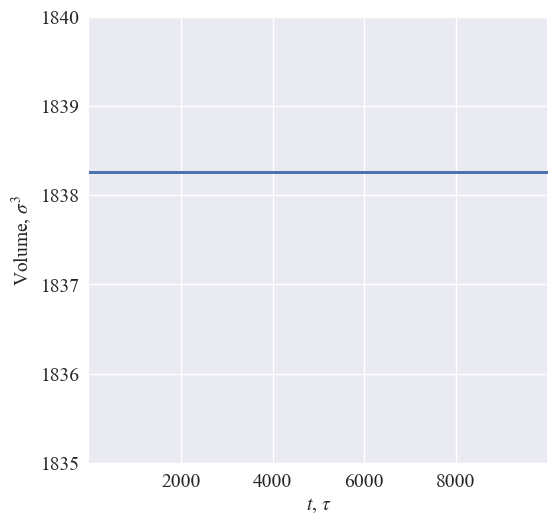

In [16]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

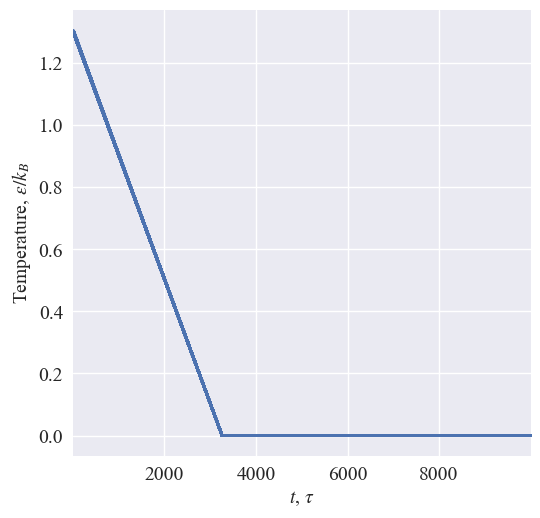

In [17]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=0,
#     top=3,
);

#### Зависимость давления системы от времени

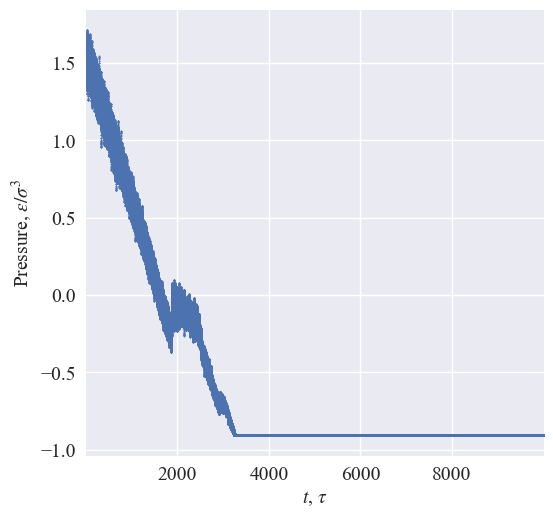

In [18]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-3,
#     top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

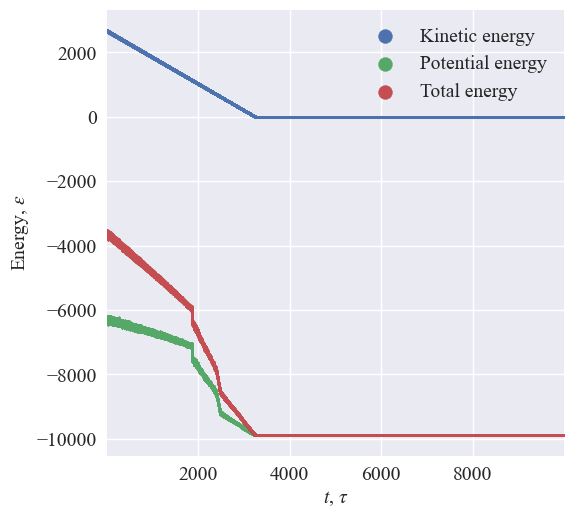

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
#     bottom=-10000,
#     top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [20]:
pp.get_enthalpy();

In [21]:
pp.get_entropy();

In [22]:
pp.get_free_energy();

In [23]:
pp.get_gibbs_energy();

In [24]:
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume,enthalpy,entropy,free_energy,gibbs_energy
0,0.200,1.30301,1.57566,2676.44240,-6266.6980,-3590.2559,3336.5640,0.0,0.0,1838.2656,0.000000,0.000000,0.000000,0.000000
1,0.205,1.30334,1.57564,2677.90800,-6267.4220,-3589.5140,3333.4968,0.0,0.0,1838.2656,0.705135,0.569230,-0.000188,-0.036953
2,0.210,1.30368,1.57409,2679.18820,-6268.8230,-3589.6350,3322.3848,0.0,0.0,1838.2656,-2.265177,0.476416,-0.000350,-2.886427
3,0.215,1.30390,1.57079,2680.03800,-6271.5030,-3591.4648,3302.4910,0.0,0.0,1838.2656,-10.161253,-0.926913,-0.000146,-8.952499
4,0.220,1.30404,1.56650,2680.60380,-6274.3945,-3593.7908,3277.7385,0.0,0.0,1838.2656,-20.373413,-2.710600,0.000234,-16.838279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999956,9999.980,0.00010,-0.90487,0.20743,-9896.6010,-9896.3940,-4990.5645,0.0,0.0,1838.2656,-10866.011069,-39791.718561,-6337.686992,-10897.559960
1999957,9999.985,0.00010,-0.90491,0.20342,-9896.6410,-9896.4375,-4990.7760,0.0,0.0,1838.2656,-10866.128099,-40226.718561,-6337.686992,-10897.633491
1999958,9999.990,0.00010,-0.90487,0.20763,-9896.6200,-9896.4120,-4990.5796,0.0,0.0,1838.2656,-10866.029069,-39971.718561,-6337.686992,-10897.559960
1999959,9999.995,0.00010,-0.90489,0.20360,-9896.6520,-9896.4490,-4990.6980,0.0,0.0,1838.2656,-10866.102834,-40341.718561,-6337.686992,-10897.596726


#### Зависимость энтропии системы от времени

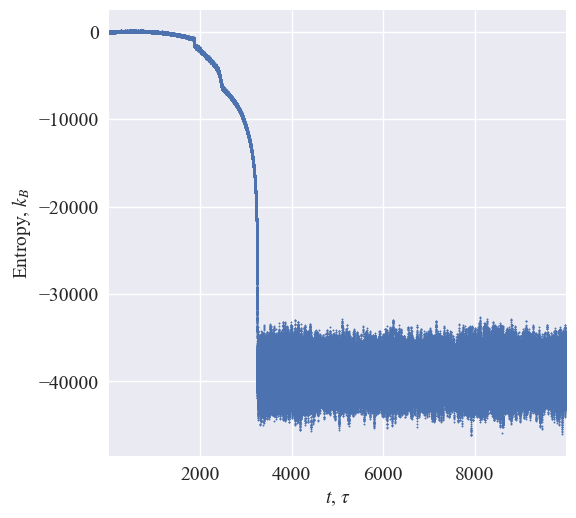

In [25]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
#     bottom=-2,
#     top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

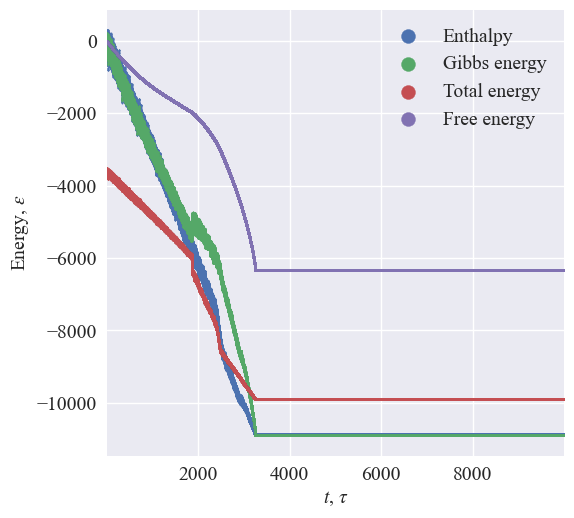

In [26]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

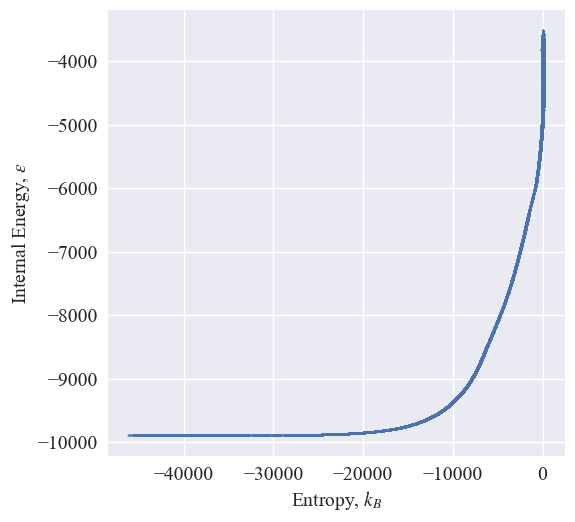

In [27]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

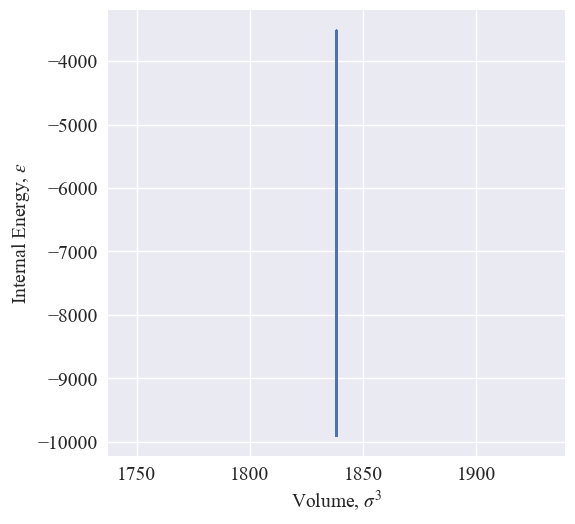

In [28]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

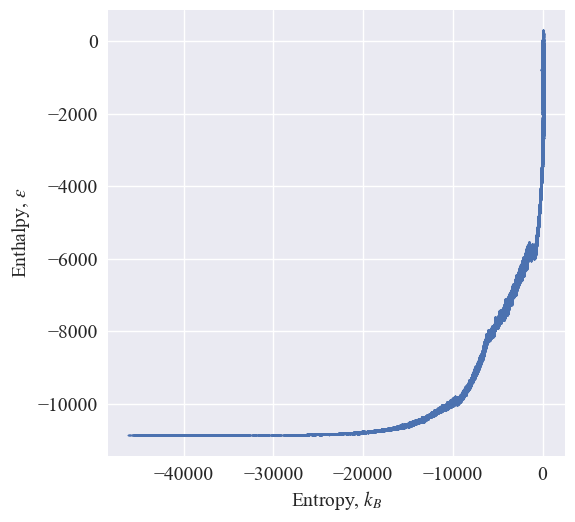

In [29]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

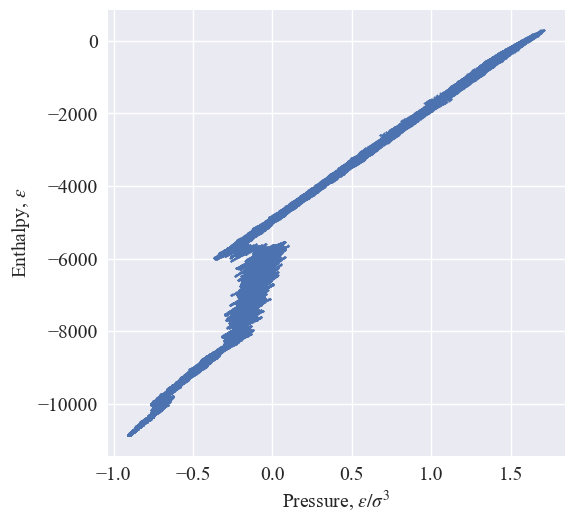

In [30]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

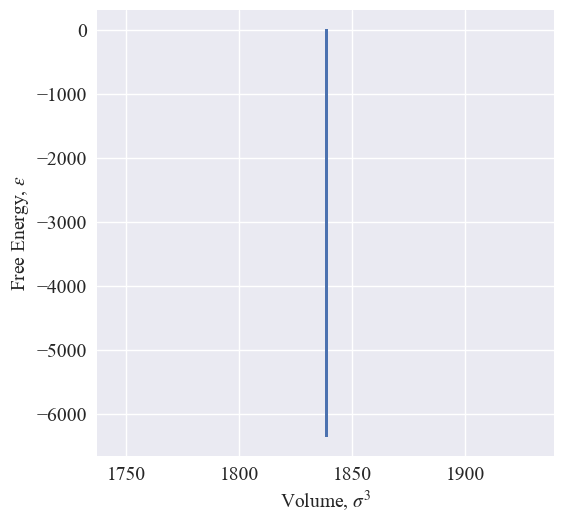

In [31]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

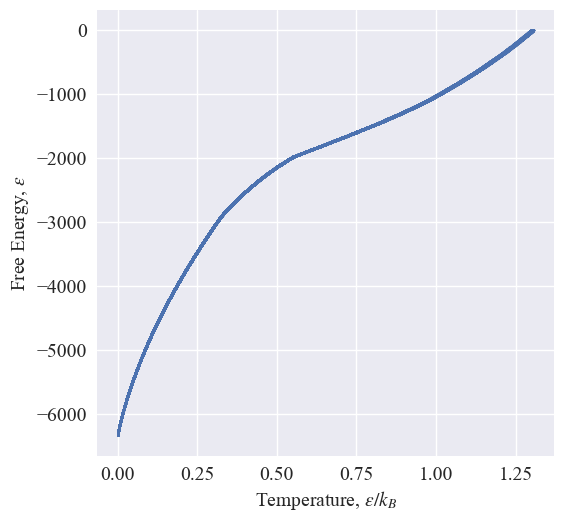

In [32]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

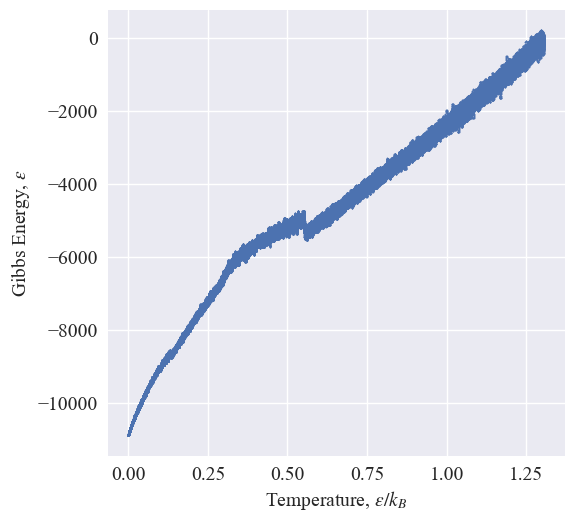

In [33]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

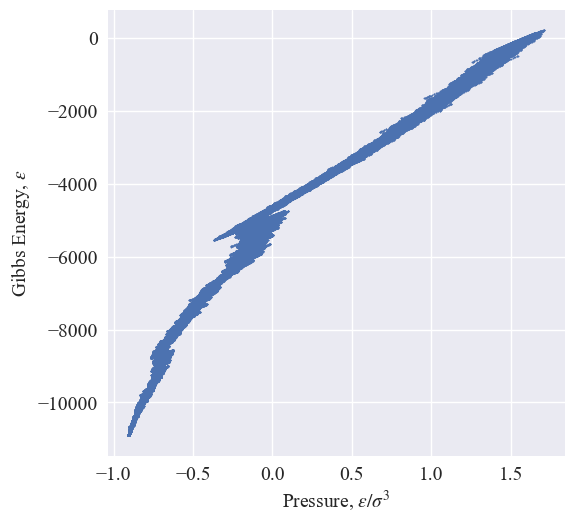

In [34]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

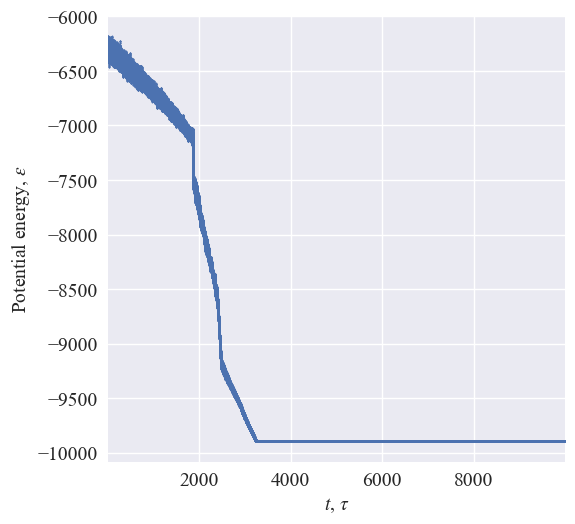

In [35]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential energy, $\epsilon$',
);